# Preparation

reference: https://vectorbt.dev/api/portfolio/base/#stats

In [142]:
import vectorbt as vbt
import pandas as pd

In [143]:
pf = vbt.Portfolio.load('data/sample_backtest.pkl')

In [144]:
# parameters
column = 0

# Details


In [145]:
# get single portfolio
_pf = pf[0]

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\base\indexing.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.indexing_func(lambda x: x.__getitem__(key), **self.indexing_kwargs)


In [146]:
# Calculate weights of the portfolio
pf_asset_value = _pf.asset_value(group_by=False)
pf_value = _pf.value()
pf_weights = pf_asset_value.vbt / pf_value
pf_weights.index = _pf.wrapper.index
pf_weights

strategy                  strategy_0          
                             BTCUSDT   ETHUSDT
Open time                                     
2017-08-17 00:00:00+00:00   0.284031  0.715969
2017-08-18 00:00:00+00:00   0.280964  0.719036
2017-08-19 00:00:00+00:00   0.284634  0.715366
2017-08-20 00:00:00+00:00   0.276396  0.723604
2017-08-21 00:00:00+00:00   0.257782  0.742218
...                              ...       ...
2017-11-20 00:00:00+00:00   0.261815  0.738185
2017-11-21 00:00:00+00:00   0.262434  0.737566
2017-11-22 00:00:00+00:00   0.254895  0.745105
2017-11-23 00:00:00+00:00   0.239104  0.760896
2017-11-24 00:00:00+00:00   0.215903  0.784097

[100 rows x 2 columns]

In [147]:
# Portoflio valuation
pf_nav = _pf.value()
pf_nav

Open time
2017-08-17 00:00:00+00:00     99.502488
2017-08-18 00:00:00+00:00     96.440409
2017-08-19 00:00:00+00:00     95.929405
2017-08-20 00:00:00+00:00     97.507291
2017-08-21 00:00:00+00:00    102.750037
                                ...    
2017-11-20 00:00:00+00:00    140.495692
2017-11-21 00:00:00+00:00    138.585370
2017-11-22 00:00:00+00:00    144.202897
2017-11-23 00:00:00+00:00    150.243352
2017-11-24 00:00:00+00:00    168.837265
Name: strategy_0, Length: 100, dtype: float64

In [148]:
# Transactions
trans = _pf.orders.records_readable
trans.columns = [c.lower().replace(' ','_') for c in trans.columns]
trans['date'] = pd.to_datetime(trans.timestamp)
trans['trade_value'] = trans['size']*trans['price']
trans['trade_weight'] = trans.set_index('date')['trade_value'].pipe(lambda df: df.div(pf_nav.loc[df.index])).values
trans['ticker'] = trans['column'].apply(lambda x: x[-1] if isinstance(x,tuple) else x)
trans = trans.set_index(['date','ticker']).sort_index()
trans


order_id                 column  \
date                      ticker                                     
2017-08-17 00:00:00+00:00 BTCUSDT         0  (strategy_0, BTCUSDT)   
                          ETHUSDT         1  (strategy_0, ETHUSDT)   
2017-09-06 00:00:00+00:00 BTCUSDT         3  (strategy_0, BTCUSDT)   
                          ETHUSDT         2  (strategy_0, ETHUSDT)   
2017-09-26 00:00:00+00:00 BTCUSDT         5  (strategy_0, BTCUSDT)   
                          ETHUSDT         4  (strategy_0, ETHUSDT)   
2017-10-16 00:00:00+00:00 BTCUSDT         6  (strategy_0, BTCUSDT)   
                          ETHUSDT         7  (strategy_0, ETHUSDT)   
2017-11-05 00:00:00+00:00 BTCUSDT         8  (strategy_0, BTCUSDT)   
                          ETHUSDT         9  (strategy_0, ETHUSDT)   

                                                  timestamp      size  \
date                      ticker                                        
2017-08-17 00:00:00+00:00 BTCUSDT 2017-08-17 00:00:00+00:00  0.006595   
                          ETHUSDT 2017-08-17 00:00:00+00:00  0.235896   
2017-09-06 00:00:00+00:00 BTCUSDT 2017-09-06 00:00:00+00:00  0.000102   
                          ETHUSDT 2017-09-06 00:00:00+00:00  0.001421   
2017-09-26 00:00:00+00:00 BTCUSDT 2017-09-26 00:00:00+00:00  0.000108   
                          ETHUSDT 2017-09-26 00:00:00+00:00  0.001477   
2017-10-16 00:00:00+00:00 BTCUSDT 2017-10-16 00:00:00+00:00  0.001050   
                          ETHUSDT 2017-10-16 00:00:00+00:00  0.017871   
2017-11-05 00:00:00+00:00 BTCUSDT 2017-11-05 00:00:00+00:00  0.001276   
                          ETHUSDT 2017-11-05 00:00:00+00:00  0.031401   

                                     price      fees  side  trade_value  \
date                      ticker                                          
2017-08-17 00:00:00+00:00 BTCUSDT  4285.08  0.141309   Buy    28.261752   
                          ETHUSDT   302.00  0.356204   Buy    71.240736   
2017-09-06 00:00:00+00:00 BTCUSDT  4619.77  0.002356   Buy     0.471162   
                          ETHUSDT   335.00  0.002379  Sell     0.475897   
2017-09-26 00:00:00+00:00 BTCUSDT  3882.35  0.002105   Buy     0.420983   
                          ETHUSDT   287.90  0.002126  Sell     0.425214   
2017-10-16 00:00:00+00:00 BTCUSDT  5760.02  0.030252  Sell     6.050413   
                          ETHUSDT   335.19  0.029951   Buy     5.990210   
2017-11-05 00:00:00+00:00 BTCUSDT  7345.01  0.046865  Sell     9.373054   
                          ETHUSDT   295.53  0.046399   Buy     9.279790   

                                   trade_weight  
date                      ticker                 
2017-08-17 00:00:00+00:00 BTCUSDT      0.284031  
                          ETHUSDT      0.715969  
2017-09-06 00:00:00+00:00 BTCUSDT      0.004303  
                          ETHUSDT      0.004347  
2017-09-26 00:00:00+00:00 BTCUSDT      0.004502  
                          ETHUSDT      0.004548  
2017-10-16 00:00:00+00:00 BTCUSDT      0.051607  
                          ETHUSDT      0.051093  
2017-11-05 00:00:00+00:00 BTCUSDT      0.080580  
                          ETHUSDT      0.079778

In [149]:
# Performanace contribution
ctr = pf_weights.shift(1)*_pf.asset_returns(group_by=False)
ctr = ctr.fillna(0)
ctr.index = pd.DatetimeIndex(ctr.index,name='date')
ctr

strategy                  strategy_0          
                             BTCUSDT   ETHUSDT
date                                          
2017-08-17 00:00:00+00:00   0.000000  0.000000
2017-08-18 00:00:00+00:00  -0.011713 -0.019061
2017-08-19 00:00:00+00:00   0.002162 -0.007460
2017-08-20 00:00:00+00:00  -0.003691  0.020140
2017-08-21 00:00:00+00:00  -0.004754  0.058522
...                              ...       ...
2017-11-20 00:00:00+00:00   0.005732  0.027548
2017-11-21 00:00:00+00:00  -0.002949 -0.010648
2017-11-22 00:00:00+00:00   0.002793  0.037742
2017-11-23 00:00:00+00:00  -0.005775  0.047664
2017-11-24 00:00:00+00:00   0.003518  0.120240

[100 rows x 2 columns]

In [150]:
fees = trans.droplevel(1).set_index('column',append=True).fees.unstack(-1).fillna(0)
fees.columns = pd.MultiIndex.from_tuples(fees.columns)
fees.columns.names = _pf.wrapper.columns.names
fees

strategy                  strategy_0          
                             BTCUSDT   ETHUSDT
date                                          
2017-08-17 00:00:00+00:00   0.141309  0.356204
2017-09-06 00:00:00+00:00   0.002356  0.002379
2017-09-26 00:00:00+00:00   0.002105  0.002126
2017-10-16 00:00:00+00:00   0.030252  0.029951
2017-11-05 00:00:00+00:00   0.046865  0.046399

In [151]:
pf_nav_shifted = pf_nav.shift(1).fillna(_pf.init_cash)
pf_nav_shifted

Open time
2017-08-17 00:00:00+00:00    100.000000
2017-08-18 00:00:00+00:00     99.502488
2017-08-19 00:00:00+00:00     96.440409
2017-08-20 00:00:00+00:00     95.929405
2017-08-21 00:00:00+00:00     97.507291
                                ...    
2017-11-20 00:00:00+00:00    135.970567
2017-11-21 00:00:00+00:00    140.495692
2017-11-22 00:00:00+00:00    138.585370
2017-11-23 00:00:00+00:00    144.202897
2017-11-24 00:00:00+00:00    150.243352
Name: strategy_0, Length: 100, dtype: float64

In [152]:
fees_pct = fees.div(pf_nav_shifted.loc[fees.index],axis=0)
fees_pct

strategy                  strategy_0          
                             BTCUSDT   ETHUSDT
date                                          
2017-08-17 00:00:00+00:00   0.001413  0.003562
2017-09-06 00:00:00+00:00   0.000023  0.000023
2017-09-26 00:00:00+00:00   0.000022  0.000022
2017-10-16 00:00:00+00:00   0.000257  0.000255
2017-11-05 00:00:00+00:00   0.000400  0.000396

In [155]:
ctr_net = ctr.sub(fees_pct.reindex(ctr.index).fillna(0),axis=1)
ctr_net

strategy                  strategy_0          
                             BTCUSDT   ETHUSDT
date                                          
2017-08-17 00:00:00+00:00  -0.001413 -0.003562
2017-08-18 00:00:00+00:00  -0.011713 -0.019061
2017-08-19 00:00:00+00:00   0.002162 -0.007460
2017-08-20 00:00:00+00:00  -0.003691  0.020140
2017-08-21 00:00:00+00:00  -0.004754  0.058522
...                              ...       ...
2017-11-20 00:00:00+00:00   0.005732  0.027548
2017-11-21 00:00:00+00:00  -0.002949 -0.010648
2017-11-22 00:00:00+00:00   0.002793  0.037742
2017-11-23 00:00:00+00:00  -0.005775  0.047664
2017-11-24 00:00:00+00:00   0.003518  0.120240

[100 rows x 2 columns]

In [157]:
tr = _pf.asset_returns()
tr.index = pd.DatetimeIndex(tr.index,name='date')
tr.iloc[0] = pf_nav_shifted.pct_change().iloc[1]
tr

date
2017-08-17 00:00:00+00:00   -0.004975
2017-08-18 00:00:00+00:00   -0.030774
2017-08-19 00:00:00+00:00   -0.005299
2017-08-20 00:00:00+00:00    0.016448
2017-08-21 00:00:00+00:00    0.053768
                               ...   
2017-11-20 00:00:00+00:00    0.033280
2017-11-21 00:00:00+00:00   -0.013597
2017-11-22 00:00:00+00:00    0.040535
2017-11-23 00:00:00+00:00    0.041889
2017-11-24 00:00:00+00:00    0.123759
Name: strategy_0, Length: 100, dtype: float64

In [158]:
unexplained = tr-ctr_net.sum(axis=1)
unexplained.round(2)

date
2017-08-17 00:00:00+00:00   -0.0
2017-08-18 00:00:00+00:00   -0.0
2017-08-19 00:00:00+00:00    0.0
2017-08-20 00:00:00+00:00   -0.0
2017-08-21 00:00:00+00:00    0.0
                            ... 
2017-11-20 00:00:00+00:00   -0.0
2017-11-21 00:00:00+00:00    0.0
2017-11-22 00:00:00+00:00   -0.0
2017-11-23 00:00:00+00:00   -0.0
2017-11-24 00:00:00+00:00    0.0
Length: 100, dtype: float64

# Analysis

## Stats

In [25]:
# Retrieve and print the backtesting stats
pf.stats(agg_func=None).T

strategy,strategy_0,strategy_1,strategy_2,strategy_3,strategy_4,strategy_5,strategy_6,strategy_7,strategy_8,strategy_9
Start,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00
End,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00
Period,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00
Start Value,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
End Value,169.93076,180.555276,178.830288,158.822769,177.32849,156.479675,187.117849,178.751552,173.647265,182.063741
Total Return [%],69.93076,80.555276,78.830288,58.822769,77.32849,56.479675,87.117849,78.751552,73.647265,82.063741
Benchmark Return [%],72.606394,72.606394,72.606394,72.606394,72.606394,72.606394,72.606394,72.606394,72.606394,72.606394
Max Gross Exposure [%],100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Total Fees Paid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max Drawdown [%],41.863454,39.10491,39.634549,44.005796,40.062453,44.40387,36.399371,39.65769,41.011843,38.599817


In [ ]:
# Single column stats
pf.stats(column=column)

Start                         2017-08-17 00:00:00+00:00
End                           2017-11-24 00:00:00+00:00
Period                                100 days 00:00:00
Start Value                                       100.0
End Value                                     169.93076
Total Return [%]                               69.93076
Benchmark Return [%]                          72.606394
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              41.863454
Max Drawdown Duration                  73 days 00:00:00
Total Trades                                          6
Total Closed Trades                                   4
Total Open Trades                                     2
Open Trade PnL                                64.412979
Win Rate [%]                                       75.0
Best Trade [%]                                71.398742
Worst Trade [%]                               -4

In [ ]:
# change frequency
pf.stats(column=column, settings=dict(freq='w'))

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\generic\stats_builder.py:262: UserWarning: Changing the frequency will create a copy of this object. Consider setting it upon object creation to re-use existing cache.
  reself = self.resolve_self(


Start                         2017-08-17 00:00:00+00:00
End                           2017-11-24 00:00:00+00:00
Period                                700 days 00:00:00
Start Value                                       100.0
End Value                                     169.93076
Total Return [%]                               69.93076
Benchmark Return [%]                          72.606394
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              41.863454
Max Drawdown Duration                 511 days 00:00:00
Total Trades                                          6
Total Closed Trades                                   4
Total Open Trades                                     2
Open Trade PnL                                64.412979
Win Rate [%]                                       75.0
Best Trade [%]                                71.398742
Worst Trade [%]                               -4

In [30]:
# metrics selection
pf.stats(metrics=['sharpe_ratio', 'sortino_ratio'], column=0)

Sharpe Ratio     2.508371
Sortino Ratio    3.685121
Name: 0, dtype: float64

In [31]:
# tags selection
# see any metric from Portfolio.metrics that has the tag key
pf.stats(column=column, tags=['trades'])



Total Trades                                 6
Total Closed Trades                          4
Total Open Trades                            2
Open Trade PnL                       64.412979
Win Rate [%]                              75.0
Best Trade [%]                       71.398742
Worst Trade [%]                      -4.668874
Avg Winning Trade [%]                38.912754
Avg Losing Trade [%]                 -4.668874
Avg Winning Trade Duration    53 days 08:00:00
Avg Losing Trade Duration     40 days 00:00:00
Profit Factor                       266.412901
Expectancy                            1.379445
Name: 0, dtype: object

In [34]:
# passing parameters
pf.stats(column=column, settings=dict(required_return=0.1, risk_free=0.01))

Start                         2017-08-17 00:00:00+00:00
End                           2017-11-24 00:00:00+00:00
Period                                100 days 00:00:00
Start Value                                       100.0
End Value                                     169.93076
Total Return [%]                               69.93076
Benchmark Return [%]                          72.606394
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              41.863454
Max Drawdown Duration                  73 days 00:00:00
Total Trades                                          6
Total Closed Trades                                   4
Total Open Trades                                     2
Open Trade PnL                                64.412979
Win Rate [%]                                       75.0
Best Trade [%]                                71.398742
Worst Trade [%]                               -4

In [37]:
# custom metric
max_winning_streak = (
    'max_winning_streak',
    dict(
        title='Max Winning Streak',
        calc_func=lambda trades: trades.winning_streak.max(),
        resolve_trades=True
    )
)
pf.stats(metrics=max_winning_streak, agg_func=None)

,Max Winning Streak
strategy,
strategy_0,2.0
strategy_1,2.0
strategy_2,2.0
strategy_3,2.0
strategy_4,2.0
strategy_5,2.0
strategy_6,2.0
strategy_7,2.0
strategy_8,2.0


In [49]:
# returns stats
pf.returns_stats(column=column)

Start                        2017-08-17 00:00:00+00:00
End                          2017-11-24 00:00:00+00:00
Period                               100 days 00:00:00
Total Return [%]                              69.93076
Benchmark Return [%]                         72.606394
Annualized Return [%]                        592.61645
Annualized Volatility [%]                    95.973284
Max Drawdown [%]                             41.863454
Max Drawdown Duration                 73 days 00:00:00
Sharpe Ratio                                  2.508371
Calmar Ratio                                 14.155938
Omega Ratio                                   1.491832
Sortino Ratio                                 3.685121
Skew                                          -0.65101
Kurtosis                                      4.839102
Tail Ratio                                     0.99267
Common Sense Ratio                            6.875395
Value at Risk                                -0.078121
Alpha     

## Quant stats adapter

In [42]:
# quant stats adapter
pf.qs.sharpe()

strategy
strategy_0    2.508371
strategy_1    2.863234
strategy_2    2.809340
strategy_3    2.142405
strategy_4    2.760360
strategy_5    2.070144
strategy_6    3.012155
strategy_7    2.806813
strategy_8    2.635911
strategy_9    2.907323
dtype: float64

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\base\indexing.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.indexing_func(lambda x: x.__getitem__(key), **self.indexing_kwargs)


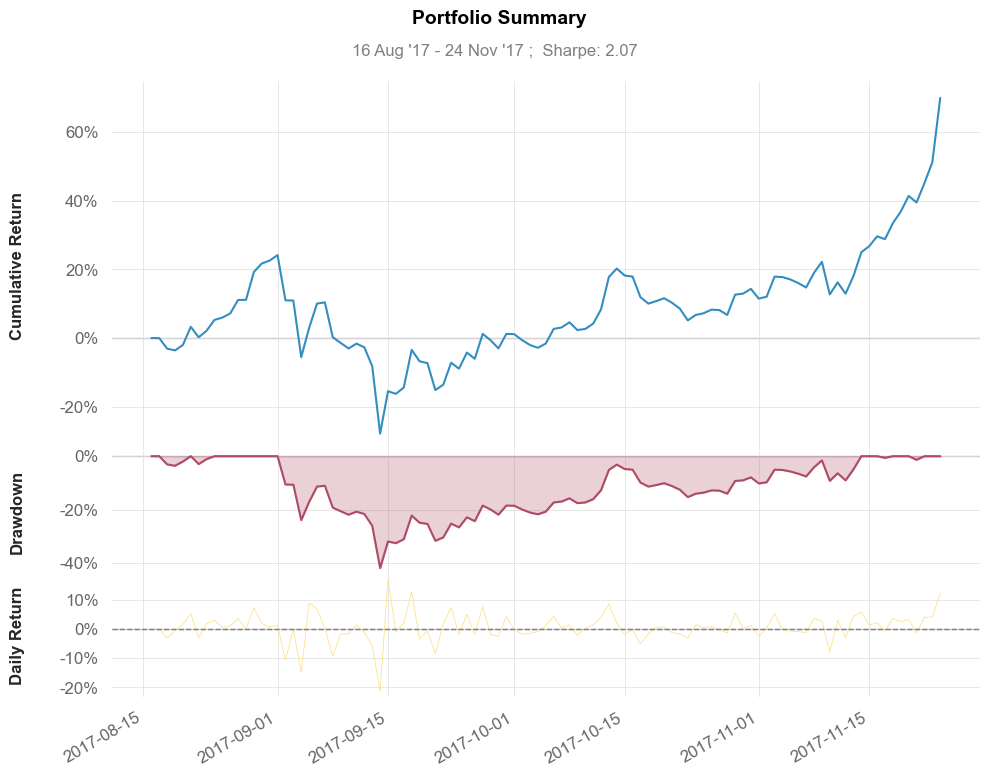

In [43]:
pf[column].qs.plot_snapshot()

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\base\indexing.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.indexing_func(lambda x: x.__getitem__(key), **self.indexing_kwargs)


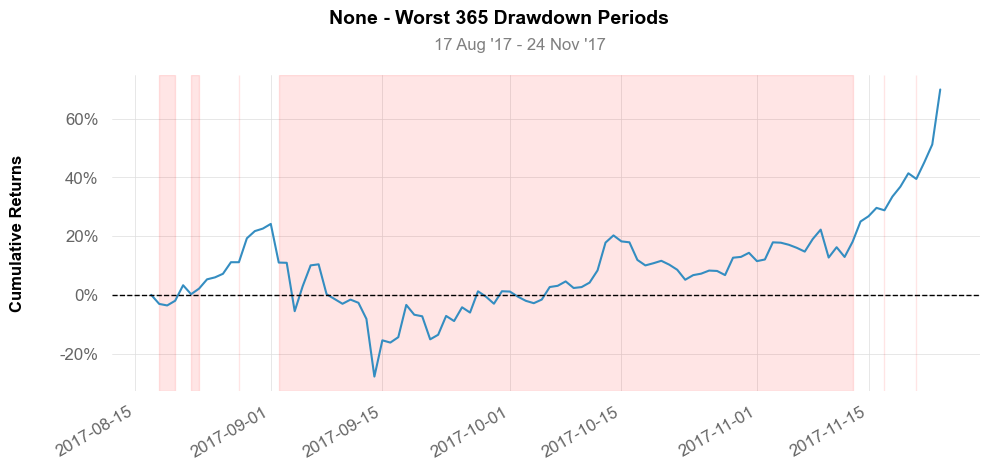

In [47]:
pf[column].qs.plot_drawdowns_periods()


## Plots

In [70]:
import pandas as pd
close = pd.read_csv('data/sample_data.csv',index_col=0).iloc[:,:1]

In [71]:
pf = vbt.Portfolio.from_random_signals(close, n=[10, 20], seed=42)
pf.wrapper.columns

Index([10, 20], dtype='int32', name='randnx_n')

In [97]:
pf.stats(agg_func=None).T

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



randnx_n,10,20
Start,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00
End,2024-12-31 00:00:00+00:00,2024-12-31 00:00:00+00:00
Period,2694,2694
Start Value,100.0,100.0
End Value,102.098802,480.477781
Total Return [%],2.098802,380.477781
Benchmark Return [%],2083.763197,2083.763197
Max Gross Exposure [%],100.0,100.0
Total Fees Paid,0.0,0.0
Max Drawdown [%],90.319631,82.991866


In [100]:
pf = pf[pf.wrapper.columns[0]]

In [103]:
pf.plot()

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#1f77b4'},
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '26614ac7-06ee-4be6-8aae-89d803cc7dfe',
              'x': array(['2017-08-17 00:00:00+00:00', '2017-08-18 00:00:00+00:00',
                          '2017-08-19 00:00:00+00:00', ..., '2024-12-29 00:00:00+00:00',
                          '2024-12-30 00:00:00+00:00', '2024-12-31 00:00:00+00:00'], dtype=object),
              'xaxis': 'x',
              'y': array([ 4285.08,  4108.37,  4139.98, ..., 93738.2 , 92792.05, 93576.  ]),
              'yaxis': 'y'},
             {'customdata': array([[0.00000000e+00, 1.28833771e-02, 0.00000000e+00],
                                   [2.00000000e+00, 1.72886188e-02, 0.00000000e+00],
                                   [4.00000000e+00, 5.46489947e-03, 0.00000000e+00],
                                   [6.00000000e+00, 1.30556200e-03, 0.

You can choose any of the subplots in https://vectorbt.dev/api/portfolio/base/#vectorbt.portfolio.base.Portfolio.subplots

In [106]:
from vectorbt.utils.colors import adjust_opacity

# Plot the subplots with the specified settings
pf.plot(
    subplots=['drawdowns', 'underwater'],
    subplot_settings=dict(
        drawdowns=dict(top_n=3),
        underwater=dict(
            trace_kwargs=dict(
                line=dict(color='#FF6F00'),
                fillcolor=adjust_opacity('#FF6F00', 0.3)
            )
        )
    )
)

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#9467bd'},
              'name': 'Value',
              'showlegend': True,
              'type': 'scatter',
              'uid': '070f53a6-988e-4072-b5df-69104eb47041',
              'x': array(['2017-08-17 00:00:00+00:00', '2017-08-18 00:00:00+00:00',
                          '2017-08-19 00:00:00+00:00', ..., '2024-12-29 00:00:00+00:00',
                          '2024-12-30 00:00:00+00:00', '2024-12-31 00:00:00+00:00'], dtype=object),
              'xaxis': 'x',
              'y': array([100.        , 100.        , 100.        , ..., 102.09880203,
                          102.09880203, 102.09880203]),
              'yaxis': 'y'},
             {'customdata': array([[0],
                                   [2],
                                   [3]]),
              'hovertemplate': 'Drawdown Id: %{customdata[0]}<br>Peak Timestamp: %{x}<br>Peak Value: %{y}',
              'legendgroup': '1',
           

In [107]:
# new function
def plot_order_size(pf, size, column=None, add_trace_kwargs=None, fig=None):
    size = pf.select_one_from_obj(size, pf.wrapper.regroup(False), column=column)
    size.rename('Order Size').vbt.barplot(
        add_trace_kwargs=add_trace_kwargs, fig=fig)

order_size = pf.orders.size.to_pd(fill_value=0.)
pf.plot(subplots=[
    'orders',
    ('order_size', dict(
        title='Order Size',
        yaxis_kwargs=dict(title='Order size'),
        check_is_not_grouped=True,
        plot_func=plot_order_size
    ))
],
    subplot_settings=dict(
        order_size=dict(
            size=order_size
        )
    )
)

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#1f77b4'},
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '12fee0df-7d05-4f0e-ad84-47b1415e9ff4',
              'x': array(['2017-08-17 00:00:00+00:00', '2017-08-18 00:00:00+00:00',
                          '2017-08-19 00:00:00+00:00', ..., '2024-12-29 00:00:00+00:00',
                          '2024-12-30 00:00:00+00:00', '2024-12-31 00:00:00+00:00'], dtype=object),
              'xaxis': 'x',
              'y': array([ 4285.08,  4108.37,  4139.98, ..., 93738.2 , 92792.05, 93576.  ]),
              'yaxis': 'y'},
             {'customdata': array([[0.00000000e+00, 1.28833771e-02, 0.00000000e+00],
                                   [2.00000000e+00, 1.72886188e-02, 0.00000000e+00],
                                   [4.00000000e+00, 5.46489947e-03, 0.00000000e+00],
                                   [6.00000000e+00, 1.30556200e-03, 0.

In [108]:
subplots = [
    ('cumulative_returns', dict(
        title='Cumulative Returns',
        yaxis_kwargs=dict(title='Cumulative returns'),
        plot_func='returns.vbt.returns.cumulative.vbt.plot',
        pass_add_trace_kwargs=True
    )),
    ('rolling_drawdown', dict(
        title='Rolling Drawdown',
        yaxis_kwargs=dict(title='Rolling drawdown'),
        plot_func=[
            'returns.vbt.returns',  # returns accessor
            (
                'rolling_max_drawdown',  # function name
                (vbt.Rep('window'),)),  # positional arguments
            'vbt.plot'  # plotting function
        ],
        pass_add_trace_kwargs=True,
        trace_names=[vbt.Sub('rolling_drawdown(${window})')],  # add window to the trace name
    ))
]
pf.plot(
    subplots,
    subplot_settings=dict(
        rolling_drawdown=dict(
            template_mapping=dict(
                window=10
            )
        )
    )
)

FigureWidget({
    'data': [{'legendgroup': '0',
              'name': 'cumulative_returns',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'f6007b60-6237-4680-81f3-ad43f2580a7a',
              'x': array(['2017-08-17 00:00:00+00:00', '2017-08-18 00:00:00+00:00',
                          '2017-08-19 00:00:00+00:00', ..., '2024-12-29 00:00:00+00:00',
                          '2024-12-30 00:00:00+00:00', '2024-12-31 00:00:00+00:00'], dtype=object),
              'xaxis': 'x',
              'y': array([0.        , 0.        , 0.        , ..., 0.02098802, 0.02098802,
                          0.02098802]),
              'yaxis': 'y'},
             {'legendgroup': '1',
              'name': 'rolling_drawdown(10)',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'c1603329-4aee-4d6c-bc7f-b97a5d60e457',
              'x': array(['2017-08-17 00:00:00+00:00', '2017-08-18 00:00:00+00:00',
                          